In [43]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Dividir el DataFrame por meses para luego unirlos con Concat()

Division del DF por meses

In [3]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

In [4]:
# dict_months = {
#               'Jan': df_jan,
#               'Feb': df_feb,
#               'Mar': df_mar,
#               'Apr': df_apr,
#               'Jun': df_jun,
#               'Jul': df_jul,
#               'Aug': df_aug,
#               'Sep': df_sep,
#               'Oct': df_oct,
#               'Nov': df_nov,
#               'Dec': df_dec,
#                             }

In [9]:
months = df['job_posted_month'].unique()
months

array(['Jun', 'Jan', 'Oct', 'Jul', 'Aug', 'Nov', 'Mar', 'Dec', 'Apr',
       'Feb', 'Sep', 'May'], dtype=object)

In [17]:
dict_months = {month: df[df['job_posted_month']==month] for month in months}
dict_months['Jan'].head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan


Concatenar meses en un DF

<Axes: xlabel='job_posted_month'>

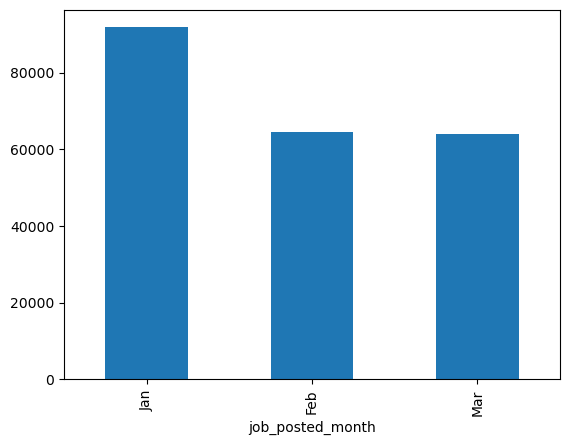

In [26]:
# Tener en un DF el primer cuarto del ano

df_concat_cuarto = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)
df_concat_cuarto['job_posted_month'].value_counts().plot(kind='bar')

Otros ejercicios

In [29]:
dfA = pd.DataFrame({
    'id': [1, 2, 3],
    'nombre': ['Ana', 'Luis', 'María']
})

dfB = pd.DataFrame({
    'id': [4, 5, 6],
    'nombre': ['Juan', 'Sara', 'Pedro']
})

concat_filas = pd.concat([dfA, dfB], ignore_index=True)
print(concat_filas)


   id nombre
0   1    Ana
1   2   Luis
2   3  María
3   4   Juan
4   5   Sara
5   6  Pedro


In [30]:
dfC = pd.DataFrame({
    'edad': [25, 30, 35]
})

concat_columnas = pd.concat([dfA, dfC], axis=1)
print(concat_columnas)


   id nombre  edad
0   1    Ana    25
1   2   Luis    30
2   3  María    35


In [ ]:
# Concatenate two DataFrames to analyze job postings for Data Scientists and Data Analysts: 
# Create one DataFrame with job postings for Data Scientists named data_scientist_df 
# and another for Data Analysts named data_analyst_df.
# Concatenate them and display the combined DataFrame called combined_df.

<Axes: xlabel='job_title_short'>

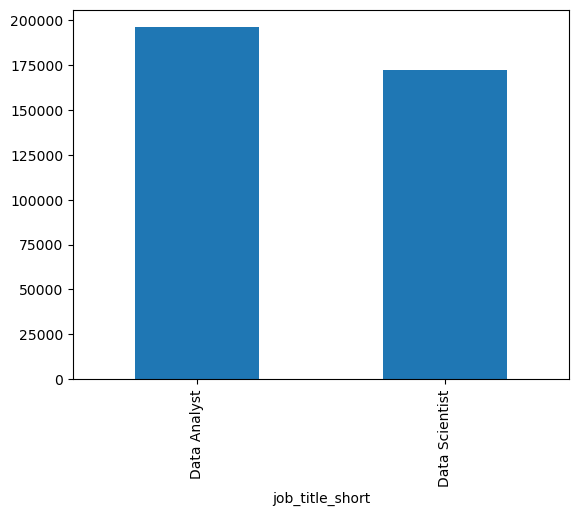

In [41]:
df_data_scientist = df[df['job_title_short'] == 'Data Scientist']
data_analyst_df = df[df['job_title_short'] == 'Data Analyst']
df_data_concat = pd.concat([df_data_scientist, data_analyst_df], ignore_index=True)
df_data_concat['job_title_short'].value_counts().plot(kind='bar')

In [42]:
# Concatenate DataFrames to analyze job postings by month:
# Create DataFrames for job postings for the last quarter (October, November, and December). These are respectively called oct_df, nov_df, and dec_df.
# Concatenate them and display the combined DataFrame named combined_df.

<Axes: xlabel='job_month'>

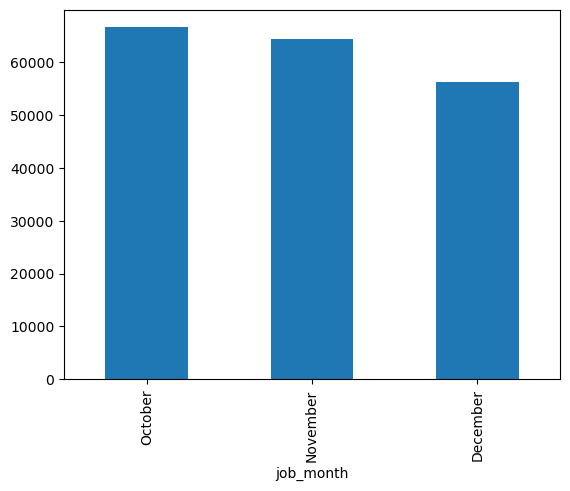

In [58]:
df_data_months = df.copy()
df_data_months['job_month'] = df_data_months['job_posted_date'].dt.strftime('%B')
df_data_oct = df_data_months[df_data_months['job_month'] == 'October']
df_data_nov = df_data_months[df_data_months['job_month'] == 'November']
df_data_dec = df_data_months[df_data_months['job_month'] == 'December']
df_concat_months = pd.concat([df_data_oct, df_data_nov, df_data_dec], ignore_index=True)
df_concat_months['job_month'].value_counts().plot(kind ='bar')



In [59]:
# Concatenate DataFrames to analyze job postings for different job types:
# Create DataFrames for 'Full-time' roles (called full_time_df) and 'Part-time' roles (called part_time_df) job postings.
# Concatenate them and display the combined DataFrame named combined_df.

<Axes: xlabel='job_schedule_type'>

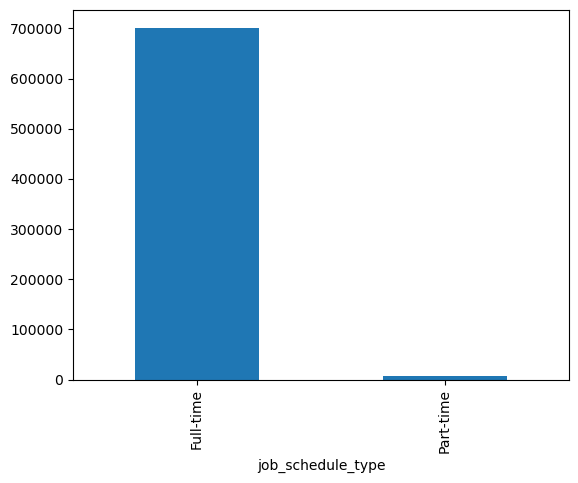

In [62]:
df_job_type = df.copy()
df_full_time = df_job_type[df_job_type['job_schedule_type']=='Full-time']
df_part_time = df_job_type[df_job_type['job_schedule_type']=='Part-time']
df_concat_time = pd.concat([df_full_time, df_part_time], ignore_index=True)
df_concat_time['job_schedule_type'].value_counts().plot(kind='bar')